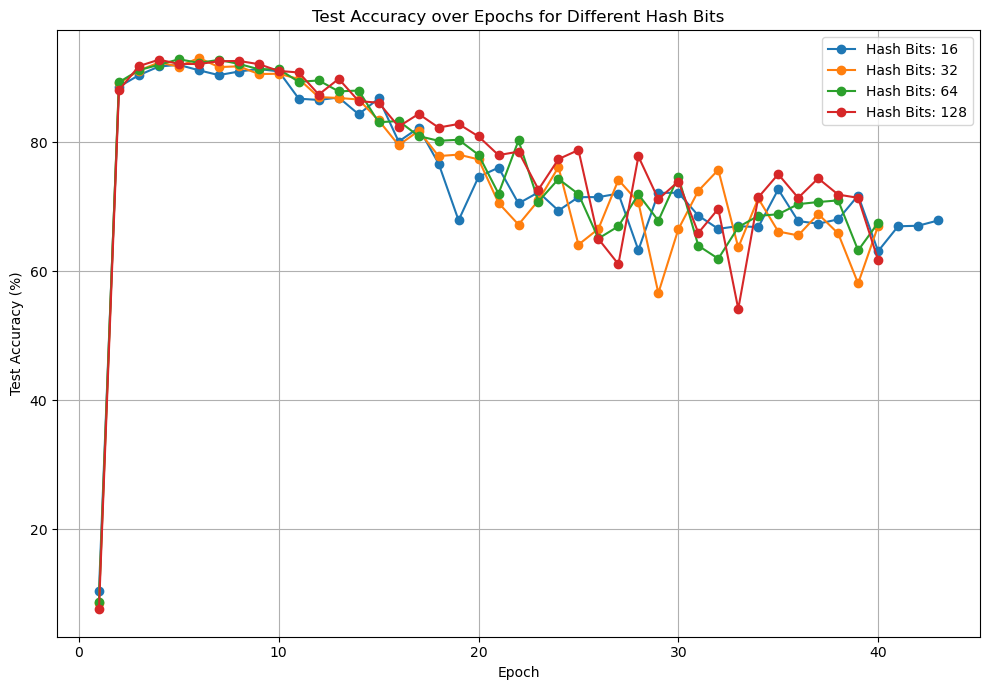

In [4]:
import matplotlib.pyplot as plt
import re

# 定义读取和解析日志文件的函数
def parse_log_file(log_file_path):
    accuracies_by_hash_bits = {
        "16": [],
        "32": [],
        "64": [],
        "128": []
    }
    
    # 读取日志文件
    with open(log_file_path, 'r') as file:
        log_content = file.readlines()
    
    current_hash_bits = None
    
    # 解析日志内容
    for line in log_content:
        if "Start Training with hash_bits:" in line:
            current_hash_bits = line.split(": ")[-1].strip()
        elif "Test Accuracy:" in line:
            accuracy = float(line.split(": ")[-1].rstrip('%\n'))
            if current_hash_bits in accuracies_by_hash_bits:
                accuracies_by_hash_bits[current_hash_bits].append(accuracy)
    
    return accuracies_by_hash_bits

# 绘制准确率折线图的函数
def plot_accuracies(accuracies_by_hash_bits):
    plt.figure(figsize=(10, 7))
    for hash_bits, accuracies in accuracies_by_hash_bits.items():
        epochs = range(1, len(accuracies) + 1)
        plt.plot(epochs, accuracies, marker='o', linestyle='-', label=f'Hash Bits: {hash_bits}')
    
    plt.title('Test Accuracy over Epochs for Different Hash Bits')
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()

# 指定日志文件路径
log_file_path = './logs/resnet34_test_hashbits.log'

# 解析日志文件
accuracies_by_hash_bits = parse_log_file(log_file_path)

# 绘制准确率折线图
plot_accuracies(accuracies_by_hash_bits)
